###Week 3 Discussion Google Colab Created by Ali Hatamizadeh 


*Load* and rotate an image


The shape of the phantom image is: (400, 400) 


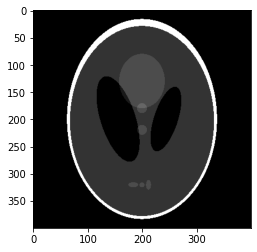

In [1]:
import scipy
from scipy import misc
import numpy as np
from matplotlib import pyplot as plt
from skimage.data import shepp_logan_phantom

img = shepp_logan_phantom()

plt.figure()
plt.imshow(img, cmap='gray')

print('The shape of the phantom image is: {} '.format(np.shape(img)))

Rotate the image for 90 degrees.

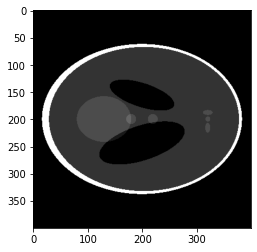

In [3]:
from skimage.transform import rotate
rotated_image=rotate(img,90)
plt.figure()
plt.imshow(rotated_image,cmap='gray')
plt.show()

### Performing Radon Transform using Scikit-image Package 

400


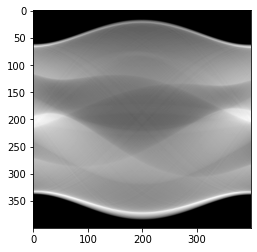

[  0.           0.45112782   0.90225564   1.35338346   1.80451128
   2.2556391    2.70676692   3.15789474   3.60902256   4.06015038
   4.5112782    4.96240602   5.41353383   5.86466165   6.31578947
   6.76691729   7.21804511   7.66917293   8.12030075   8.57142857
   9.02255639   9.47368421   9.92481203  10.37593985  10.82706767
  11.27819549  11.72932331  12.18045113  12.63157895  13.08270677
  13.53383459  13.98496241  14.43609023  14.88721805  15.33834586
  15.78947368  16.2406015   16.69172932  17.14285714  17.59398496
  18.04511278  18.4962406   18.94736842  19.39849624  19.84962406
  20.30075188  20.7518797   21.20300752  21.65413534  22.10526316
  22.55639098  23.0075188   23.45864662  23.90977444  24.36090226
  24.81203008  25.26315789  25.71428571  26.16541353  26.61654135
  27.06766917  27.51879699  27.96992481  28.42105263  28.87218045
  29.32330827  29.77443609  30.22556391  30.67669173  31.12781955
  31.57894737  32.03007519  32.48120301  32.93233083  33.38345865
  33.83458

In [9]:
from skimage.transform import radon

num_projections=len(img)
print(num_projections)

theta=np.linspace(0.0,180.0,num_projections)
sinogram_scikit=radon(img,theta=theta)

plt.figure()
plt.imshow(sinogram_scikit,cmap='gray')
plt.show()
print(theta)

### Backprojection (Inverse Radon Transform) 





In [11]:
m,n = sinogram_scikit.shape

print ('The shape of the sinogram is ({},{})'.format(m,n))

The shape of the sinogram is (400,400)


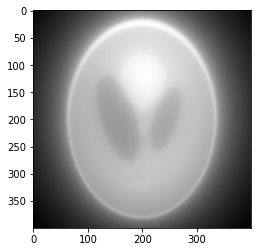

In [15]:
mid_index=m//2
reconstructed = np.zeros((m,n))
[Y,X]=np.mgrid[0:m,0:n]
xpr= X-mid_index
ypr= Y-mid_index

theta=np.linspace(0,180,n)
th=(np.pi/180)*theta

for i in range(len(th)):
  cur_points=mid_index+xpr*np.cos(th[i])-ypr*np.sin(th[i])
  spot=np.where((cur_points>0)&(cur_points<n))
  cur_reconstructed=np.zeros((m,n))
  new_points=cur_points[spot]
  new_points=new_points.astype('int32')
  cur_reconstructed[spot]=sinogram_scikit[new_points,i]
  reconstructed=reconstructed+cur_reconstructed

reoncstructed=reconstructed*(np.pi)/(2*len(th))

plt.imshow(reconstructed,cmap='gray')
plt.show()